In [1]:
import matplotlib

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
datos=pd.read_csv("athlete_events.csv")

In [6]:
datos

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [10]:
paises_x_medallas=datos[["NOC"]]

In [11]:
paises_x_medallas

,NOC
0,CHN
1,CHN
2,DEN
3,DEN
4,NED
...,...
271111,POL
271112,POL
271113,POL
271114,POL


<AxesSubplot:>

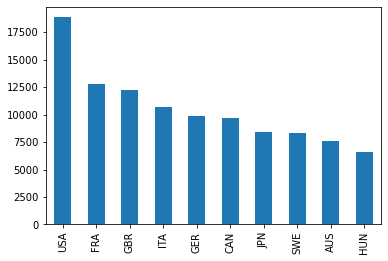

In [13]:
paises_x_medallas["NOC"].value_counts().head(10).plot(kind="bar")

In [14]:
tiempo=datos[["Year","Season","Medal","NOC"]]

In [16]:
tiempo

,Year,Season,Medal,NOC
0,1992,Summer,NaN,CHN
1,2012,Summer,NaN,CHN
2,1920,Summer,NaN,DEN
3,1900,Summer,Gold,DEN
4,1988,Winter,NaN,NED
...,...,...,...,...
271111,1976,Winter,NaN,POL
271112,2014,Winter,NaN,POL
271113,2014,Winter,NaN,POL
271114,1998,Winter,NaN,POL


In [17]:
datos_2=pd.get_dummies(tiempo[["Medal"]])

In [18]:
datos_2

,Medal_Bronze,Medal_Gold,Medal_Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
271111,0,0,0
271112,0,0,0
271113,0,0,0
271114,0,0,0


In [19]:
result=pd.concat([tiempo,datos_2],axis=1)

In [20]:
result

,Year,Season,Medal,NOC,Medal_Bronze,Medal_Gold,Medal_Silver
0,1992,Summer,NaN,CHN,0,0,0
1,2012,Summer,NaN,CHN,0,0,0
2,1920,Summer,NaN,DEN,0,0,0
3,1900,Summer,Gold,DEN,0,1,0
4,1988,Winter,NaN,NED,0,0,0
...,...,...,...,...,...,...,...
271111,1976,Winter,NaN,POL,0,0,0
271112,2014,Winter,NaN,POL,0,0,0
271113,2014,Winter,NaN,POL,0,0,0
271114,1998,Winter,NaN,POL,0,0,0


In [22]:
tiempo_2=result.groupby(["Year","Medal","Season"]).sum()

In [23]:
tiempo_2

Medal_Bronze  Medal_Gold  Medal_Silver
Year Medal  Season                                        
1896 Bronze Summer          38.0         0.0           0.0
     Gold   Summer           0.0        62.0           0.0
     Silver Summer           0.0         0.0          43.0
1900 Bronze Summer         175.0         0.0           0.0
     Gold   Summer           0.0       201.0           0.0
...                          ...         ...           ...
2014 Gold   Winter           0.0       202.0           0.0
     Silver Winter           0.0         0.0         197.0
2016 Bronze Summer         703.0         0.0           0.0
     Gold   Summer           0.0       665.0           0.0
     Silver Summer           0.0         0.0         655.0

[153 rows x 3 columns]

In [24]:
tiempo_2["total_medals"]=tiempo_2["Medal_Bronze"]+tiempo_2["Medal_Gold"]+tiempo_2["Medal_Silver"]

In [25]:
tiempo_2

Medal_Bronze  Medal_Gold  Medal_Silver  total_medals
Year Medal  Season                                                      
1896 Bronze Summer          38.0         0.0           0.0          38.0
     Gold   Summer           0.0        62.0           0.0          62.0
     Silver Summer           0.0         0.0          43.0          43.0
1900 Bronze Summer         175.0         0.0           0.0         175.0
     Gold   Summer           0.0       201.0           0.0         201.0
...                          ...         ...           ...           ...
2014 Gold   Winter           0.0       202.0           0.0         202.0
     Silver Winter           0.0         0.0         197.0         197.0
2016 Bronze Summer         703.0         0.0           0.0         703.0
     Gold   Summer           0.0       665.0           0.0         665.0
     Silver Summer           0.0         0.0         655.0         655.0

[153 rows x 4 columns]

In [26]:
nombres=tiempo_2["total_medals"][:3].unique()

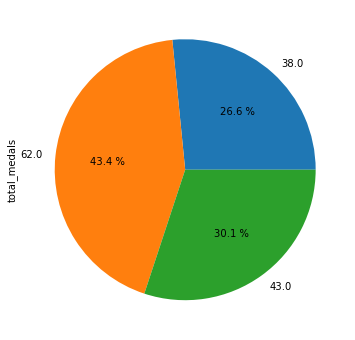

In [28]:
plot=tiempo_2["total_medals"][:3].plot.pie(figsize=(11,6),labels=nombres,autopct="%0.1f %%")

In [67]:
tiempo_2["Medal_Bronze"].tail()[2:5]

Year  Medal   Season
2016  Bronze  Summer    703.0
      Gold    Summer      0.0
      Silver  Summer      0.0
Name: Medal_Bronze, dtype: float64

In [70]:
tiempo_2["total_medals"].tail()[2:5]

Year  Medal   Season
2016  Bronze  Summer    703.0
      Gold    Summer    665.0
      Silver  Summer    655.0
Name: total_medals, dtype: float64

In [71]:
nombres2=tiempo_2["total_medals"].tail()[2:5].unique()

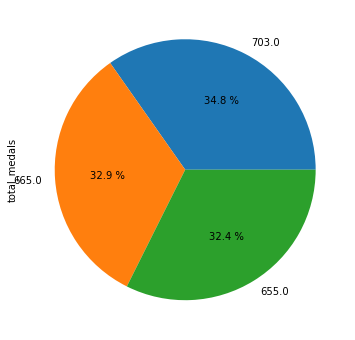

In [73]:
plot2=tiempo_2["total_medals"].tail()[2:5].plot.pie(figsize=(11,6),labels=nombres2,autopct="%0.1f %%")